In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [282]:
pd.set_option('display.max_columns', None)

deliveries = pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [342]:
#as the team name was changed making changes in the data for accurate anaylysis
deliveries = deliveries.replace('Delhi Daredevils', 'Delhi Capitals')




In [330]:
deliveries.shape

(179078, 21)

In [346]:
matches = pd.read_csv('matches.csv')
matches = matches.replace({'Delhi Daredevils': 'Delhi Capitals'})

matches[matches.team1=='Delhi Capitals']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
8,9,2017,Pune,2017-04-11,Delhi Capitals,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
17,18,2017,Delhi,2017-04-17,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,bat,normal,0,Kolkata Knight Riders,0,4,NM Coulter-Nile,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
30,31,2017,Kolkata,2017-04-28,Delhi Capitals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,G Gambhir,Eden Gardens,NJ Llong,S Ravi,NaN
34,35,2017,Chandigarh,2017-04-30,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
50,51,2017,Delhi,2017-05-12,Delhi Capitals,Rising Pune Supergiant,Delhi Capitals,bat,normal,0,Delhi Capitals,7,0,KK Nair,Feroz Shah Kotla,KN Ananthapadmanabhan,CK Nandan,NaN
72,73,2008,Chandigarh,2008-04-27,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Kings XI Punjab,0,4,SM Katich,"Punjab Cricket Association Stadium, Mohali",RE Koertzen,I Shivram,NaN
75,76,2008,Delhi,2008-04-30,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Delhi Capitals,10,0,GD McGrath,Feroz Shah Kotla,Aleem Dar,I Shivram,NaN
86,87,2008,Delhi,2008-05-08,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,MS Dhoni,Feroz Shah Kotla,Aleem Dar,RB Tiffin,NaN
92,93,2008,Jaipur,2008-05-11,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,SR Watson,Sawai Mansingh Stadium,SJ Davis,RE Koertzen,NaN


In [347]:
#checking matches between 'MI' and 'DC'
matches[((matches['team1']=='Delhi Capitals')&(matches['team2']=='Mumbai Indians'))|((matches['team2']=='Delhi Capitals')&(matches['team1']=='Mumbai Indians'))]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
81,82,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN
108,109,2008,Delhi,2008-05-24,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,KD Karthik,Feroz Shah Kotla,BF Bowden,K Hariharan,NaN
149,150,2009,East London,2009-05-08,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Delhi Capitals,0,7,A Nehra,Buffalo Park,M Erasmus,SK Tarapore,NaN
169,170,2009,Centurion,2009-05-21,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,4,V Sehwag,SuperSport Park,IL Howell,S Ravi,NaN
182,183,2010,Delhi,2010-03-17,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,98,0,SR Tendulkar,Feroz Shah Kotla,BR Doctrove,SK Tarapore,NaN
220,221,2010,Mumbai,2010-04-13,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Mumbai Indians,39,0,KA Pollard,Brabourne Stadium,S Asnani,DJ Harper,NaN
237,238,2011,Delhi,2011-04-10,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,normal,0,Mumbai Indians,0,8,SL Malinga,Feroz Shah Kotla,AM Saheba,RB Tiffin,NaN
281,282,2011,Mumbai,2011-05-07,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,32,0,AT Rayudu,Wankhede Stadium,K Hariharan,SJA Taufel,NaN


# Q1. Who will win the match?

In [348]:
#checking total matches played by MI
matches_mi = matches[(matches['team1']=='Mumbai Indians')|(matches['team2']=='Mumbai Indians')]

wins_mi = np.sum(matches_mi.winner == 'Mumbai Indians')

print("Total matches played by MI:", matches_mi.shape[0])
print("Total matches won by MI:", wins_mi)
print("MI winning percentage:", (wins_mi/matches_mi.shape[0]*100))

Total matches played by MI: 187
Total matches won by MI: 109
MI winning percentage: 58.288770053475936


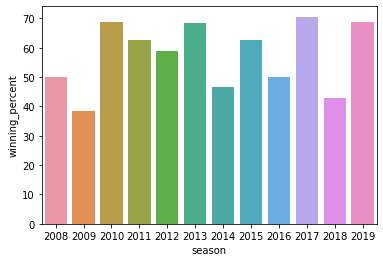

In [349]:
#checking mi matches winning percentage per season

mi_wins = matches_mi[matches_mi.winner == 'Mumbai Indians']
# matches['season'].unique()
mi_season_wins = mi_wins.groupby('season')['winner'].count().reset_index()
mi_season_wins['total_matches_mi']=matches_mi.groupby('season')['id'].count().values
mi_season_wins['winning_percent']= (mi_season_wins.winner/mi_season_wins.total_matches_mi)*100


sns.barplot(x=mi_season_wins['season'], y = mi_season_wins['winning_percent'])

In [350]:
#checking total matches played by DC
matches_dc = matches[(matches['team1']=='Delhi Capitals')|(matches['team2']=='Delhi Capitals')]

wins_dc = np.sum(matches_mi.winner == 'Delhi Capitals')

print("Total matches played by DC:", matches_dc.shape[0])
print("Total matches won by DC:", wins_dc)
print("DC winning percentage:", (wins_dc/matches_dc.shape[0]*100))

Total matches played by DC: 177
Total matches won by DC: 12
DC winning percentage: 6.779661016949152


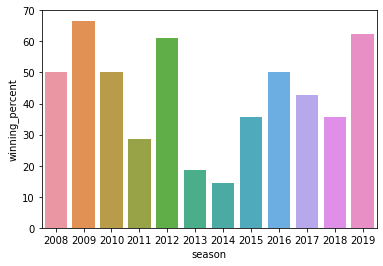

In [351]:
#checking Delhi Capitals matches winning percentage per season

dc_wins = matches_dc[matches_dc.winner == 'Delhi Capitals']
# matches['season'].unique()
dc_season_wins = dc_wins.groupby('season')['winner'].count().reset_index()
dc_season_wins['total_matches_dc']=matches_dc.groupby('season')['id'].count().values
dc_season_wins['winning_percent']= (dc_season_wins.winner/dc_season_wins.total_matches_dc)*100


sns.barplot(x=dc_season_wins['season'], y = dc_season_wins['winning_percent'])

#the graph above is not pretty apt because Delhi capitals has only played 16 matches and its a new team as it has only played in 2019. so we cant trust this much

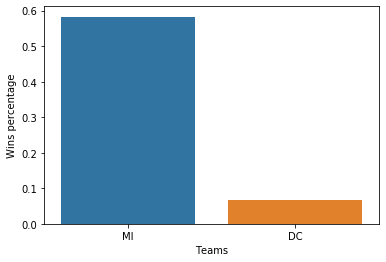

In [352]:
#lets check winning percept of mi overall and dc overall
sns.barplot(x=['MI', 'DC'], y=[wins_mi/matches_mi.shape[0], wins_dc/matches_dc.shape[0]]);
plt.xlabel('Teams')
plt.ylabel('Wins percentage')
plt.show()

In [317]:
#lets also check mi winning percent in 2019 and dc winning percent in 2019

mi_2019_winp = mi_season_wins[mi_season_wins.season==2019]
print("MI 2019 wiining percent:")
display(mi_2019_winp)

dc_2019_winp = dc_season_wins[dc_season_wins.season==2019]
print("DC 2019 winning percent:")
display(dc_2019_winp)



MI 2019 wiining percent:


,season,winner,total_matches_mi,winning_percent
11,2019,11,16,68.75


DC 2019 winning percent:


,season,winner,total_matches_dc,winning_percent
0,2019,10,16,62.5


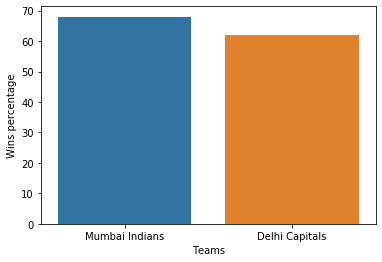

In [318]:
#compating winning percent

#lets check winning percept of mi overall and dc overall
sns.barplot(x=['Mumbai Indians', 'Delhi Capitals'], y=[int(mi_2019_winp.winning_percent.values), int(dc_2019_winp.winning_percent.values)]);
plt.xlabel('Teams')
plt.ylabel('Wins percentage')
plt.show()

**Inference:**
    - From the plot above we can clearly see MI has a very high percent to win over DC if we consider overall matches
    - however it wont be fair to judge that way, has we have only 2019 stats for Delhi Capitals, and for 2019 season again MI has higher percent by only 1 extra match they won. So it definitely is atough competition

# Q2. What will the toss winning captain decide to do first?

In [319]:
#checking toss decisions taken by MI
matches_mi.toss_decision.value_counts()

field    111
bat       76
Name: toss_decision, dtype: int64

In [320]:
#checking toss decisions taken by DC
matches_dc.toss_decision.value_counts() 

field    12
bat       4
Name: toss_decision, dtype: int64

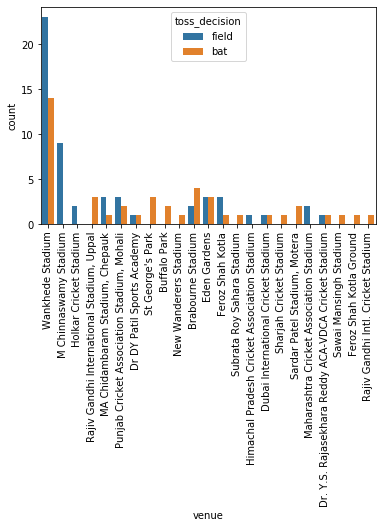

In [321]:
#checking if mi team decides toss decision on basis of location
df = matches_mi.loc[matches_mi.toss_winner=='Mumbai Indians',['season', 'venue', 'toss_decision']]

sns.countplot(df['venue'], hue=df['toss_decision'])
plt.xticks(rotation=90);

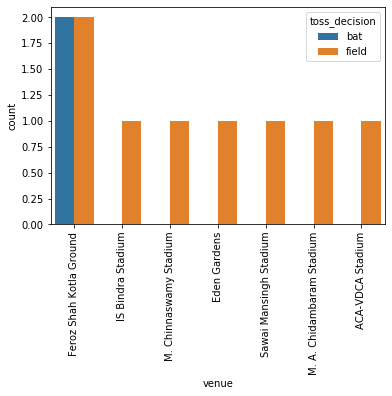

In [322]:
#checking if mi team decides toss decision on basis of location
df = matches_dc.loc[matches_dc.toss_winner=='Delhi Capitals',['season', 'venue', 'toss_decision']]

sns.countplot(df['venue'], hue=df['toss_decision'])
plt.xticks(rotation=90);

**Inference:**
    - For what the teams will choose to play as when they win the toss is not very predictable, but mostly both the teams have chosen `fielding` instead of `batting`.
    
    - Also as the matches of 2020 IPL are all in Dubai we cant really judge on the basis of the locations.
    
    - As both the teams mostly have chosen fielding lets we can go with 'Fielding' as our option
    
    - But we have also seen both times toss winner was Mumbai Indians and when they chose to field they lost the match, but when they chose to bat they won the match. So its a bit skeptical on what they will chosse.

# Q3. How many runs will Rohit Sharma score in the match?

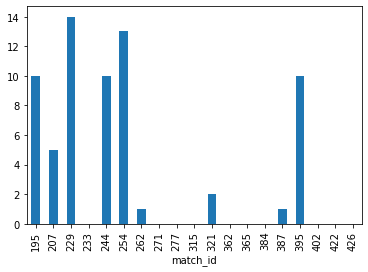

In [323]:
deliveries[deliveries['batsman']=='R Sharma'].groupby('match_id')['batsman_runs'].sum().plot(kind='bar')

In [324]:
rs_runs = deliveries[deliveries['batsman']=='R Sharma'].groupby('match_id')['batsman_runs'].sum().values

print(f'Average runs scored by Mohit Sharma: {np.mean(rs_runs)}')
print(f'Median runs scored by Mohit Sharma: {np.median(rs_runs)}')
print(f'Minimum runs scored by Mohit Sharma: {np.min(rs_runs)}')
print(f'Maximum runs scored by Mohit Sharma: {np.max(rs_runs)}')



Average runs scored by Mohit Sharma: 3.473684210526316
Median runs scored by Mohit Sharma: 0.0
Minimum runs scored by Mohit Sharma: 0
Maximum runs scored by Mohit Sharma: 14


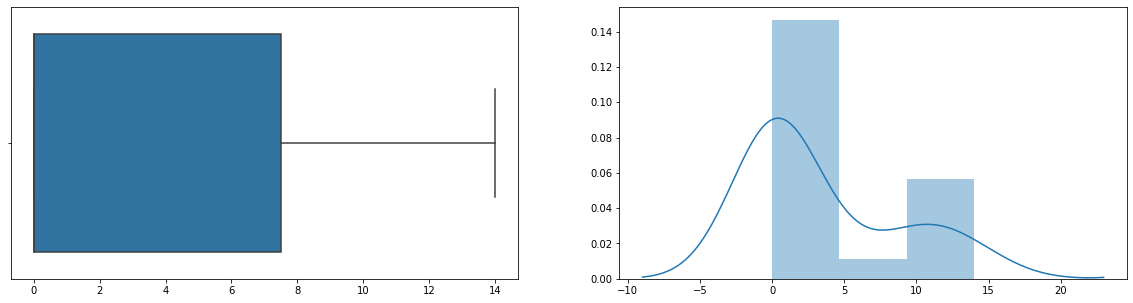

In [325]:
#checking visually

fig, ax = plt.subplots(1,2, figsize=(20,5))


sns.boxplot(rs_runs, ax=ax[0]);
sns.distplot(rs_runs, ax=ax[1])

In [326]:
#checking how many runs rohit sharma scored each match between MI and DC

rs_bats = deliveries[deliveries['batsman']=='R Sharma']

#getting matches between MI and DC only
# we now know matches between MI and DC have match id 11139 and 11325
rs_bats[(rs_bats.match_id==11139)|(rs_bats.match_id==11325)]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder


**Inference:**
    From the results above we can understand Rohit Sharma did not bat during MI and DC match as per the data, however we know from Rohit Sharma's performance in other matches we know Rohit Sharma scored minimum 0 runs maximum 14 runs and on an average 3 runs. So we can safely choose option 1 which says (0-15) runs

# Q4. How many wickets will Kagiso Rabada take in the match

In [211]:
krab_bowls = deliveries[deliveries['bowler']=='K Rabada']



,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5512,24,1,Mumbai Indians,Delhi Daredevils,1,1,PA Patel,JC Buttler,K Rabada,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
5513,24,1,Mumbai Indians,Delhi Daredevils,1,2,JC Buttler,PA Patel,K Rabada,0,5,0,0,0,0,0,5,5,NaN,NaN,NaN
5514,24,1,Mumbai Indians,Delhi Daredevils,1,3,JC Buttler,PA Patel,K Rabada,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
5515,24,1,Mumbai Indians,Delhi Daredevils,1,4,PA Patel,JC Buttler,K Rabada,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
5516,24,1,Mumbai Indians,Delhi Daredevils,1,5,JC Buttler,PA Patel,K Rabada,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
5517,24,1,Mumbai Indians,Delhi Daredevils,1,6,JC Buttler,PA Patel,K Rabada,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
5518,24,1,Mumbai Indians,Delhi Daredevils,1,7,JC Buttler,PA Patel,K Rabada,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
5533,24,1,Mumbai Indians,Delhi Daredevils,4,1,JC Buttler,PA Patel,K Rabada,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
5534,24,1,Mumbai Indians,Delhi Daredevils,4,2,JC Buttler,PA Patel,K Rabada,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
5535,24,1,Mumbai Indians,Delhi Daredevils,4,3,JC Buttler,PA Patel,K Rabada,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [205]:
#checking all wickets of rabada
krab_bowls[krab_bowls['player_dismissed'].notnull()]

#counting wickets per match
krab_bowls.groupby('match_id')['player_dismissed'].count().head()

match_id
24    2
31    2
35    0
39    0
41    3
Name: player_dismissed, dtype: int64

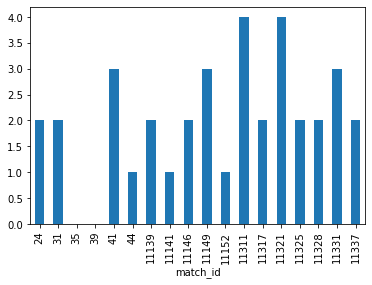

In [147]:
#checking total wickets scored in each match by rabada
krab_bowls.groupby('match_id')['player_dismissed'].count().plot(kind='bar')

In [149]:
kr_wickets = krab_bowls.groupby('match_id')['player_dismissed'].count().values

print(f'Average runs scored by Kagiso Rabada: {np.mean(kr_wickets)}')
print(f'Median runs scored by Kagiso Rabada: {np.median(kr_wickets)}')
print(f'Minimum runs scored by Kagiso Rabada: {np.min(kr_wickets)}')
print(f'Maximum runs scored by Kagiso Rabada: {np.max(kr_wickets)}')

Average runs scored by Kagiso Rabada: 2.0
Median runs scored by Kagiso Rabada: 2.0
Minimum runs scored by Kagiso Rabada: 0
Maximum runs scored by Kagiso Rabada: 4


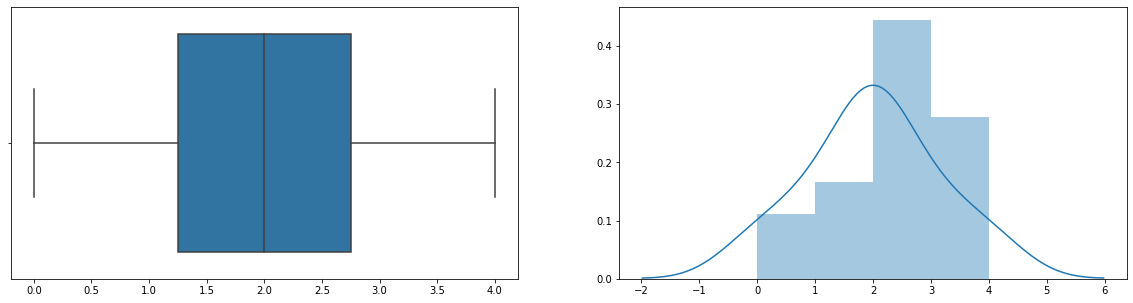

In [150]:
#checking visually

fig, ax = plt.subplots(1,2, figsize=(20,5))


sns.boxplot(kr_wickets, ax=ax[0]);
sns.distplot(kr_wickets, ax=ax[1])

In [215]:
#Now lets check in matches between MI and DC when rabada was bowling
kr_bowl_midc = krab_bowls[((krab_bowls.batting_team=='Mumbai Indians')&(krab_bowls.bowling_team=='Delhi Capitals'))|((krab_bowls.batting_team=='Delhi Capitals')&(krab_bowls.bowling_team=='Mumbai Indians'))]

#now filter rows where only rabada was bowling
kr_wickets_midc = kr_bowl_midc[kr_bowl_midc.player_dismissed.notnull()]

#counting wickets taken by rabada in each match
kr_wickets_midc.groupby('match_id')['player_dismissed'].count()

match_id
11139    2
11325    2
Name: player_dismissed, dtype: int64

**Inference:**
    - As per the previous matches and also the match played between MI and RC we have seen that average wickets scored by Kagiso Rabada are 2 per match.

# Q5. How many wides will be bowled in total during the match?

In [156]:
deliveries['wide_runs'].value_counts()

0    173673
1      4915
2       230
5       208
3        47
4         5
Name: wide_runs, dtype: int64

In [202]:
wide_bowls = deliveries[deliveries.wide_runs!=0]

#counting wide bowls during a match
wide_bowls.groupby('match_id')['ball'].count().head()

match_id
1     8
2     8
3     9
4    13
5     8
Name: ball, dtype: int64

In [203]:
#checking wide bowls only when MI is playing
wb_mi = wide_bowls[(wide_bowls.batting_team=='Mumbai Indians')|(wide_bowls.bowling_team=='Mumbai Indians')]

wb_mi.groupby('match_id')['ball'].count().head()

match_id
2      8
7     12
10     6
12     9
16    12
Name: ball, dtype: int64

In [187]:
wb_mi_count = wb_mi.groupby('match_id')['ball'].count().values

print(f'Average wide bowls by Mumbai Indians in a match: {np.mean(wb_mi_count)}')
print(f'Median  wide bowls by Mumbai Indians in a match: {np.median(wb_mi_count)}')
print(f'Minimum  wide bowls by Mumbai Indians in a match: {np.min(wb_mi_count)}')
print(f'Maximum  wide bowls by Mumbai Indians in a match: {np.max(wb_mi_count)}')

Average wide bowls by Mumbai Indians in a match: 8.058823529411764
Median  wide bowls by Mumbai Indians in a match: 8.0
Minimum  wide bowls by Mumbai Indians in a match: 1
Maximum  wide bowls by Mumbai Indians in a match: 20


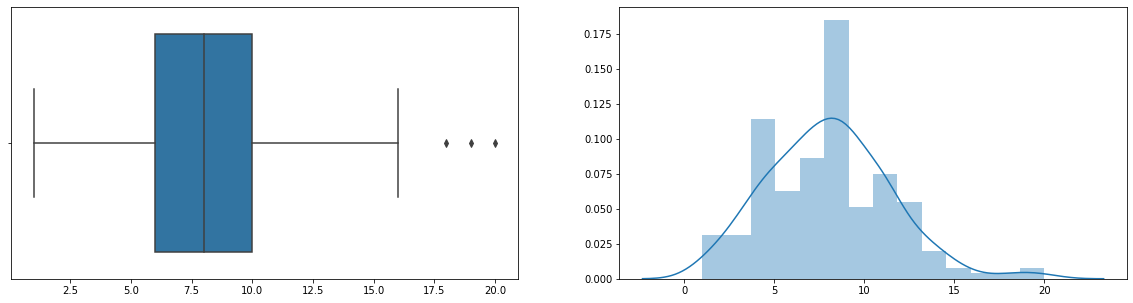

In [189]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(wb_mi_count, ax = ax[0])
sns.distplot(wb_mi_count, ax=ax[1])


In [204]:
#checking wide bowls only when DC is playing
wb_dc = wide_bowls[(wide_bowls.batting_team=='Delhi Capitals')|(wide_bowls.bowling_team=='Delhi Capitals')]

wb_dc.groupby('match_id')['ball'].count().head()

match_id
11139    8
11141    6
11146    6
11149    9
11152    5
Name: ball, dtype: int64

In [191]:
wb_dc_count = wb_dc.groupby('match_id')['ball'].count().values

print(f'Average wide bowls by Delhi Capitals in a match: {np.mean(wb_dc_count)}')
print(f'Median  wide bowls by Delhi Capitals in a match: {np.median(wb_dc_count)}')
print(f'Minimum  wide bowls by Delhi Capitals in a match: {np.min(wb_dc_count)}')
print(f'Maximum  wide bowls by Delhi Capitals in a match: {np.max(wb_dc_count)}')

Average wide bowls by Delhi Capitals in a match: 6.1875
Median  wide bowls by Delhi Capitals in a match: 6.0
Minimum  wide bowls by Delhi Capitals in a match: 2
Maximum  wide bowls by Delhi Capitals in a match: 10


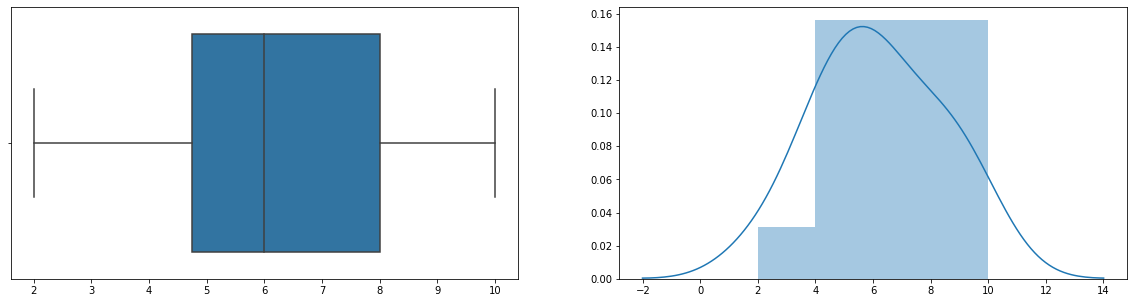

In [192]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(wb_dc_count, ax = ax[0])
sns.distplot(wb_dc_count, ax=ax[1])


In [199]:
#lets also check the matches played between MI and DC
wb_mi_dc = wide_bowls[((wide_bowls.batting_team=='Mumbai Indians')&(wide_bowls.bowling_team=='Delhi Capitals'))|((wide_bowls.batting_team=='Delhi Capitals')&(wide_bowls.bowling_team=='Mumbai Indians'))]

wb_mi_dc.groupby('match_id')['ball'].count()

match_id
11139    8
11325    6
Name: ball, dtype: int64

In [200]:
wb_midc = wb_mi_dc.groupby('match_id')['ball'].count()

print(f'Average wide bowls in (MI and DC) match: {np.mean(wb_midc)}')
print(f'Median  wide bowls in (MI and DC) match: {np.median(wb_midc)}')
print(f'Minimum  wide bowls in (MI and DC) match: {np.min(wb_midc)}')
print(f'Maximum  wide bowls in (MI and DC) match: {np.max(wb_midc)}')

Average wide bowls in (MI and DC) match: 7.0
Median  wide bowls in (MI and DC) match: 7.0
Minimum  wide bowls in (MI and DC) match: 6
Maximum  wide bowls in (MI and DC) match: 8


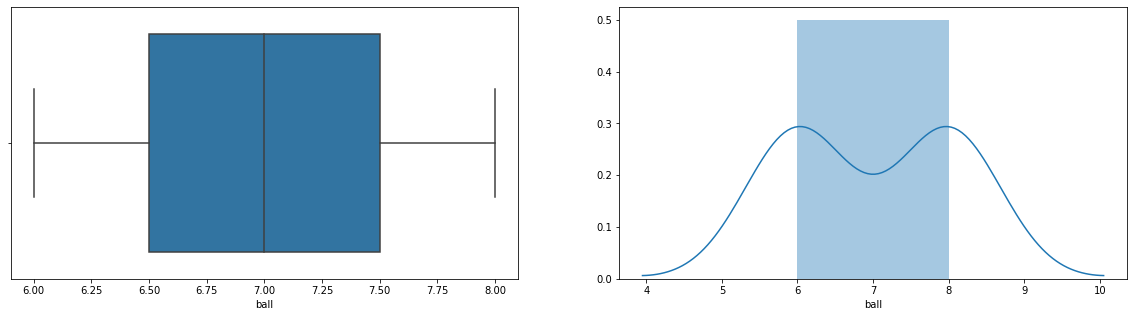

In [201]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(wb_midc, ax = ax[0])
sns.distplot(wb_midc, ax=ax[1])

**Inference:**
    So from all the plots and graphs above we have understood 
        - MI on an average has around 8 wide bowls in a match
        - DC on an average has around 6 wide bowls in a match
        - we also checked MI - DC match, there were only 2 such matches though but on an average we can say they might have 6-8 wide bowls . So we can clearly go with option D (6 or more)